In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats

## Preprocessing; Understanding the data features

Link for further read: https://scikit-learn.org/stable/modules/preprocessing.html

### Step 1: Visualizing data

In [6]:
data = pd.read_csv("PC_fC_cleaned.csv")
data

,Subject,Group,Sex,Age,SensoriMotor.Lateral (L)-SensoriMotor.Lateral (R),SensoriMotor.Lateral (L)-SensoriMotor.Superior,SensoriMotor.Lateral (L)-Visual.Medial,SensoriMotor.Lateral (L)-Visual.Occipital,SensoriMotor.Lateral (L)-Visual.Lateral (L),SensoriMotor.Lateral (L)-Visual.Lateral (R),...,SensoriMotor.Superior-Visual.Medial,SensoriMotor.Superior-Visual.Occipital,SensoriMotor.Superior-Visual.Lateral (L),SensoriMotor.Superior-Visual.Lateral (R),Visual.Medial-Visual.Occipital,Visual.Medial-Visual.Lateral (L),Visual.Medial-Visual.Lateral (R),Visual.Occipital-Visual.Lateral (L),Visual.Occipital-Visual.Lateral (R),Visual.Lateral (L)-Visual.Lateral (R)
0,3105,PD,M,71,0.233036,0.182421,0.149747,0.079457,0.053418,0.847668,...,0.358974,-0.273450,-0.357386,-0.143062,0.710603,0.808792,0.678552,1.237407,0.844726,0.728808
1,3107,PD,M,75,0.434141,0.009736,-1.052367,-0.666285,-0.612428,-0.241574,...,0.237722,0.055083,0.757095,0.102179,0.939666,1.262845,0.722696,0.742472,0.943098,0.546790
2,3108,PD,F,54,2.132074,0.947992,0.904353,1.214211,1.506697,1.269061,...,0.812582,0.447342,0.620014,0.881913,0.961153,1.058423,0.701767,1.511811,0.979815,1.260155
3,3111,PD,M,67,1.368646,0.420313,-0.347961,-0.306607,0.582675,0.305459,...,-0.075951,-0.804239,0.826654,0.128513,0.999289,0.538017,1.089815,0.043478,0.719269,1.126892
4,3113,PD,F,61,0.366834,0.208605,0.425113,-0.207801,-0.035988,-0.045164,...,-0.286681,-1.654372,-0.978734,-0.755529,0.236384,0.897129,0.686873,0.691408,0.519424,1.052945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,342385,Control,F,65,0.783248,0.390098,0.922266,0.540934,0.321879,0.075490,...,0.723001,0.554386,0.524621,0.338959,0.901066,0.528095,0.093575,0.477947,0.297163,1.250739
142,352106,Control,F,66,1.110344,1.100425,1.002826,-0.013788,0.600339,0.201454,...,0.519310,-0.325011,0.086647,-0.146216,0.405088,1.231979,0.979836,0.645405,0.815524,1.060931
143,356887,Control,M,72,1.707822,0.761005,0.127753,0.272825,0.427662,0.711322,...,0.635728,-0.175895,0.320750,0.419506,-0.991934,-0.177417,0.119938,0.774547,0.554435,1.286793
144,369705,Control,F,30,1.745917,1.191827,0.751361,0.462725,1.125131,1.061120,...,0.810347,0.652792,1.534920,1.387193,1.150529,1.530400,1.633666,1.027374,1.143029,2.468190


In [7]:
data.groupby(['Group', 'Sex']).sum()

Subject   Age  SensoriMotor.Lateral (L)-SensoriMotor.Lateral (R)  \
Group   Sex                                                                     
Control F    6018061  1844                                          33.014736   
        M    5657504  3143                                          50.546681   
PD      F      68528  1239                                          22.246905   
        M     170823  3166                                          51.802136   

             SensoriMotor.Lateral (L)-SensoriMotor.Superior  \
Group   Sex                                                   
Control F                                         19.296620   
        M                                         31.422007   
PD      F                                          8.899807   
        M                                         22.044416   

             SensoriMotor.Lateral (L)-Visual.Medial  \
Group   Sex                                           
Control F                                  8.326634   
        M                                 11.853755   
PD      F                                  3.719077   
        M                                  6.805281   

             SensoriMotor.Lateral (L)-Visual.Occipital  \
Group   Sex                                              
Control F                                     5.093638   
        M                                     8.673870   
PD      F                                     0.971466   
        M                                     4.819475   

             SensoriMotor.Lateral (L)-Visual.Lateral (L)  \
Group   Sex                                                
Control F                                       9.689003   
        M                                      16.942316   
PD      F                                       2.476894   
        M                                      16.185342   

             SensoriMotor.Lateral (L)-Visual.Lateral (R)  \
Group   Sex                                                
Control F                                      11.868049   
        M                                      16.668419   
PD      F                                       3.406146   
        M                                      17.527798   

             SensoriMotor.Lateral (R)-SensoriMotor.Superior  \
Group   Sex                                                   
Control F                                         22.294224   
        M                                         25.752201   
PD      F                                          7.504052   
        M                                         24.055107   

             SensoriMotor.Lateral (R)-Visual.Medial  ...  \
Group   Sex                                          ...   
Control F                                  9.929357  ...   
        M                                 12.632393  ...   
PD      F                                  3.657010  ...   
        M                                  8.927919  ...   

             SensoriMotor.Superior-Visual.Medial  \
Group   Sex                                        
Control F                               8.553767   
        M                              17.402678   
PD      F                               0.658952   
        M                              12.253400   

             SensoriMotor.Superior-Visual.Occipital  \
Group   Sex                                           
Control F                                  6.182315   
        M                                  7.278116   
PD      F                                  0.674800   
        M                                  5.421730   

             SensoriMotor.Superior-Visual.Lateral (L)  \
Group   Sex                                             
Control F                                   16.852611   
        M                                   15.847004   
PD      F                                    3.602182   
        M                                   13.869499   

             Senso

In [8]:
data.describe() 
data.isnull().sum() #Checking NaN values

Subject                                              0
Group                                                0
Sex                                                  0
Age                                                  0
SensoriMotor.Lateral (L)-SensoriMotor.Lateral (R)    0
SensoriMotor.Lateral (L)-SensoriMotor.Superior       0
SensoriMotor.Lateral (L)-Visual.Medial               0
SensoriMotor.Lateral (L)-Visual.Occipital            0
SensoriMotor.Lateral (L)-Visual.Lateral (L)          0
SensoriMotor.Lateral (L)-Visual.Lateral (R)          0
SensoriMotor.Lateral (R)-SensoriMotor.Superior       0
SensoriMotor.Lateral (R)-Visual.Medial               0
SensoriMotor.Lateral (R)-Visual.Occipital            0
SensoriMotor.Lateral (R)-Visual.Lateral (L)          0
SensoriMotor.Lateral (R)-Visual.Lateral (R)          0
SensoriMotor.Superior-Visual.Medial                  0
SensoriMotor.Superior-Visual.Occipital               0
SensoriMotor.Superior-Visual.Lateral (L)             0
SensoriMot

array([[<Axes: title={'center': 'SensoriMotor.Lateral (L)-SensoriMotor.Lateral (R)'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (L)-SensoriMotor.Superior'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (L)-Visual.Medial'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (L)-Visual.Occipital'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (L)-Visual.Lateral (L)'}>],
       [<Axes: title={'center': 'SensoriMotor.Lateral (L)-Visual.Lateral (R)'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (R)-SensoriMotor.Superior'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (R)-Visual.Medial'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (R)-Visual.Occipital'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (R)-Visual.Lateral (L)'}>],
       [<Axes: title={'center': 'SensoriMotor.Lateral (R)-Visual.Lateral (R)'}>,
        <Axes: title={'center': 'SensoriMotor.Superior-Visual.Medial'}>,
        <Axes: title={'center': 'Sen

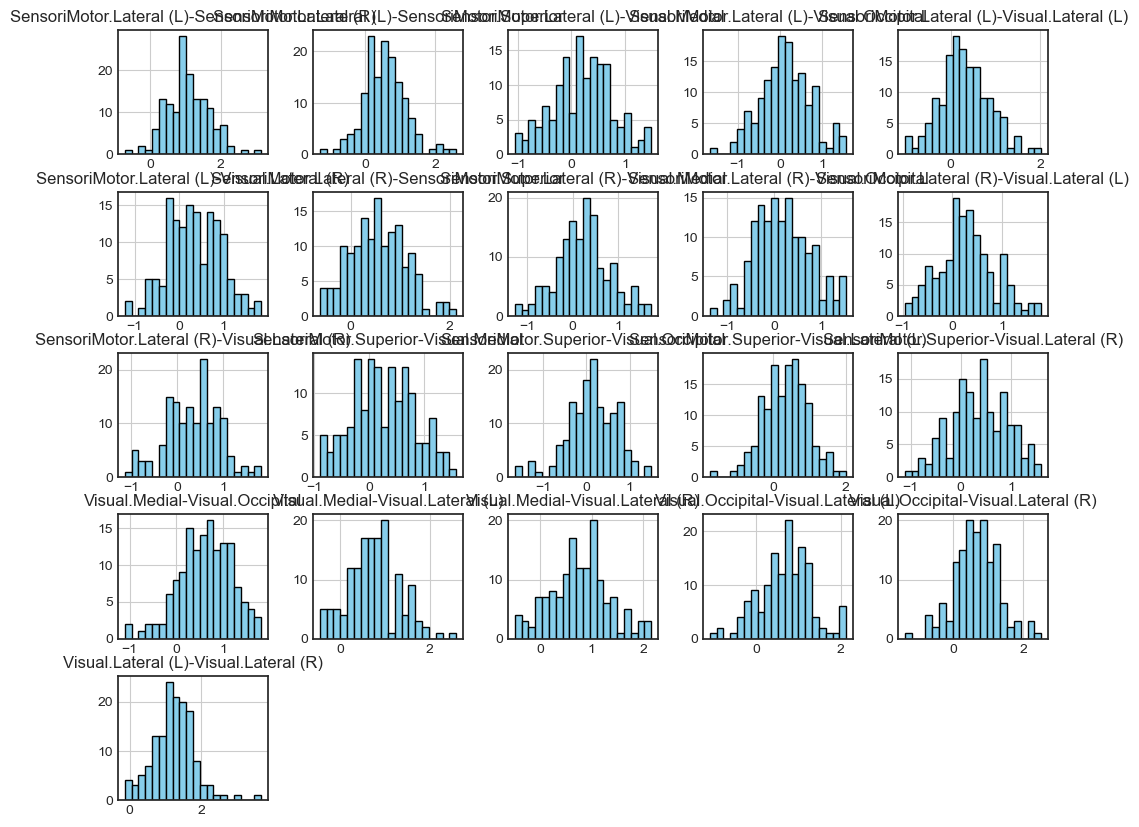

In [9]:
plt.style.use('seaborn-v0_8-white') 
data.iloc[:,4:].hist(bins = 20, figsize = (12,10), color = 'skyblue', edgecolor = 'black')

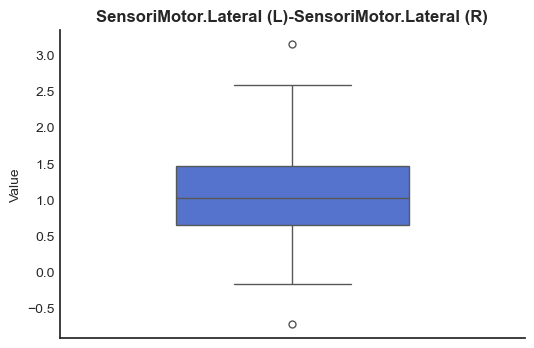

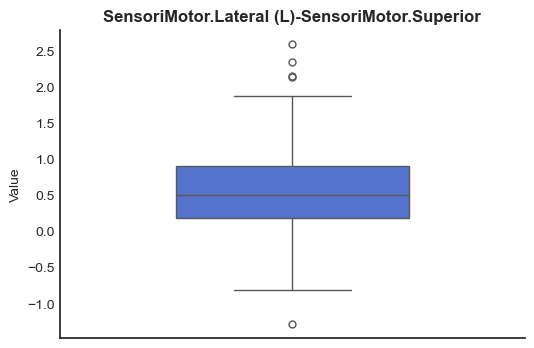

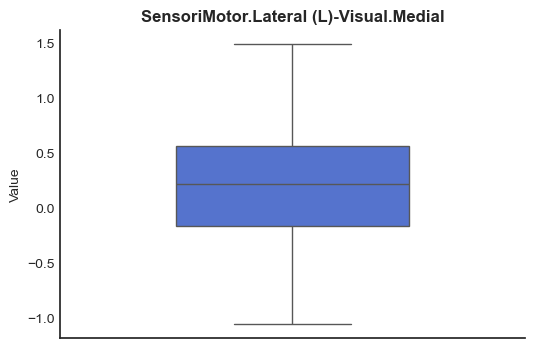

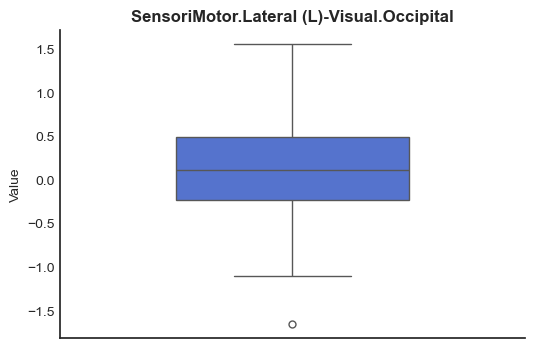

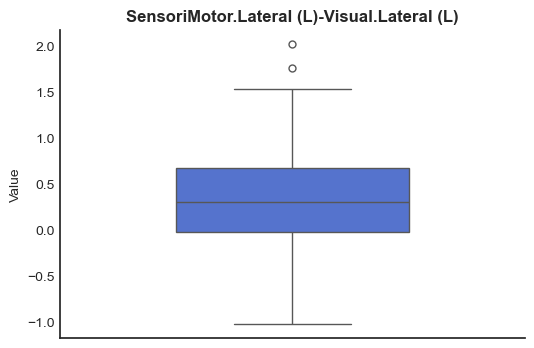

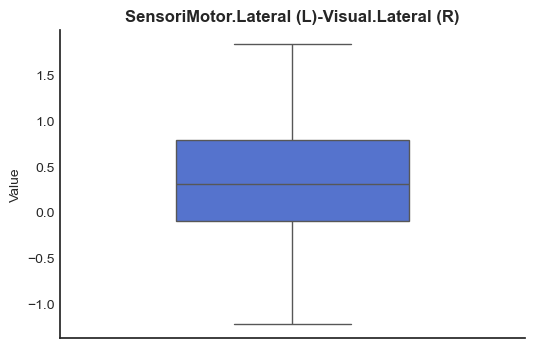

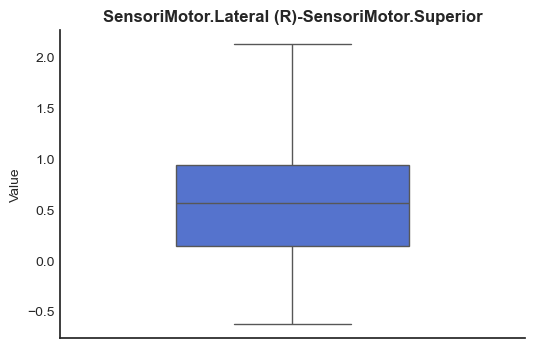

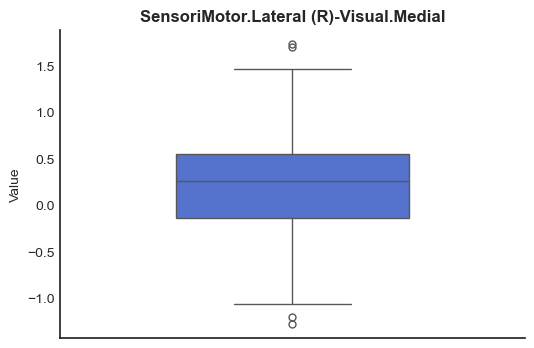

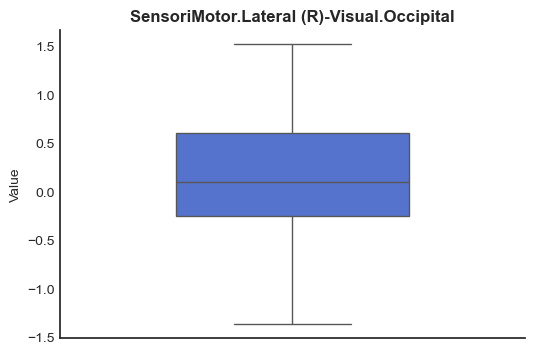

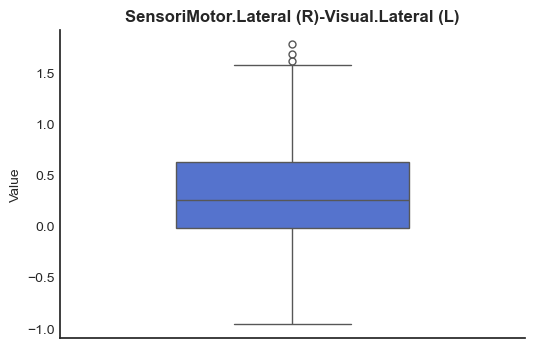

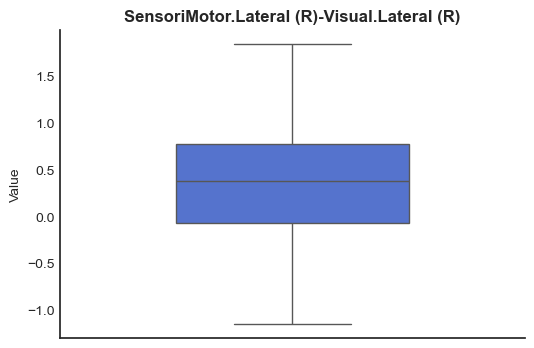

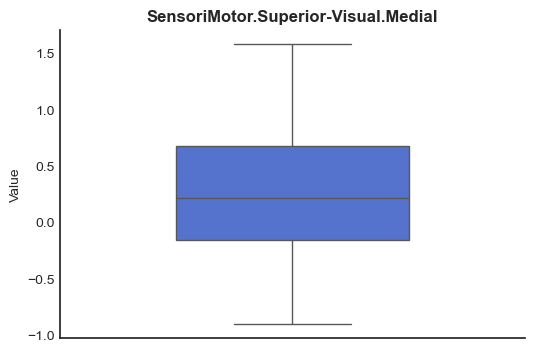

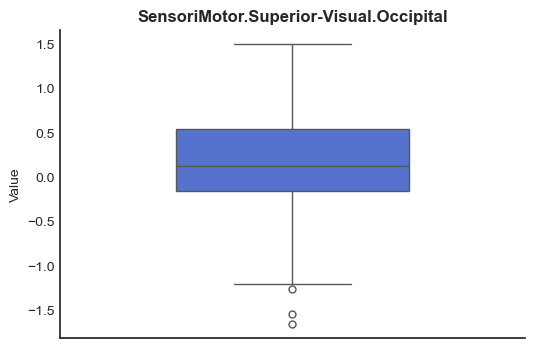

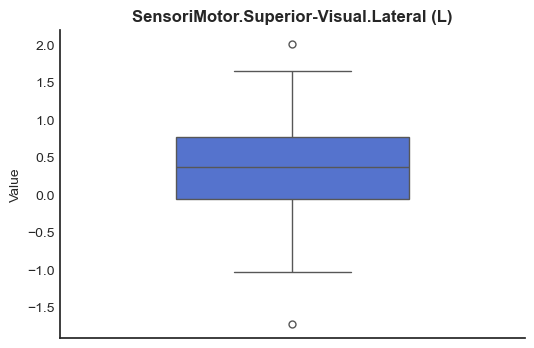

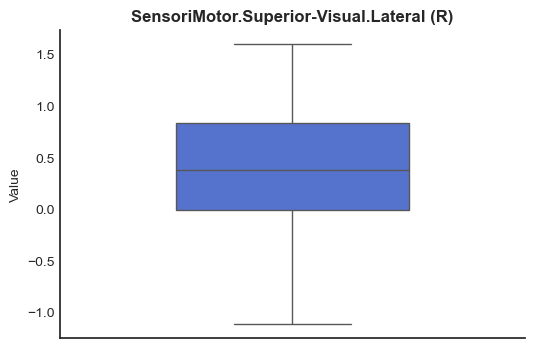

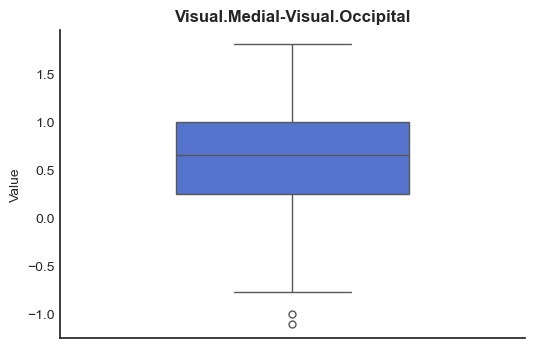

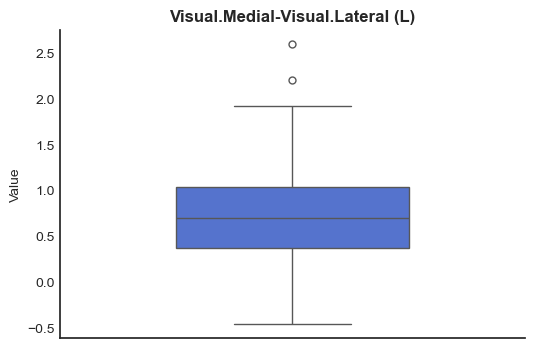

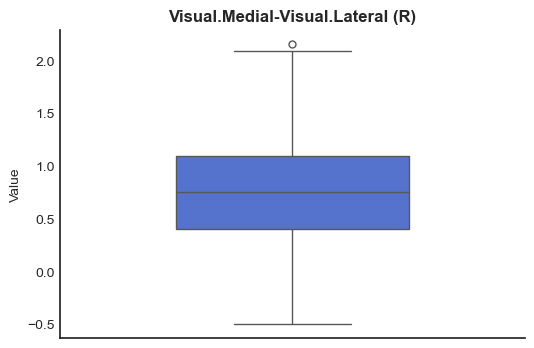

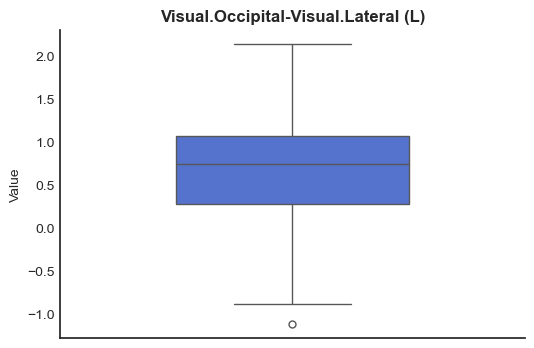

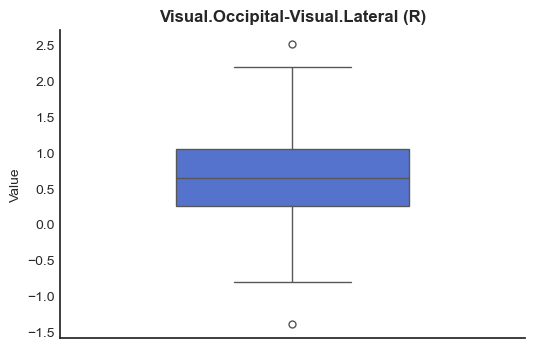

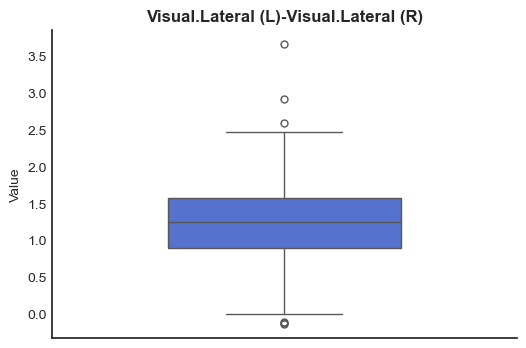

In [10]:
plt.style.use('seaborn-v0_8-white') 
for corr in data.iloc[:, 4:].columns:
        plt.figure(figsize=(6, 4))  # Slightly wider for better readability
        sns.boxplot(data=data[corr], color='royalblue', width=0.5, flierprops={'marker': 'o', 'markersize': 5})
        plt.title(f'{corr}', fontsize=12, fontweight='bold')
        plt.xlabel('')  # Remove redundant x-axis label
        plt.ylabel('Value', fontsize=10)
        plt.grid(False)
        sns.despine()
        plt.show()

### Step 2: Identify Outliers and Normalization

In [12]:
##  with quantile

for feature in data.iloc[:, 4:].columns:
    Q1= data[feature].quantile(0.25)
    Q3= data[feature].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    data[feature] = np.where(
        (data[feature] < low_bound )| (data[feature] > up_bound), 
        data[feature].median(),
        data[feature])

In [13]:
#plt.style.use('seaborn-v0_8-white') 
#data.iloc[:,4:].hist(bins = 20, figsize = (12,10), color = 'skyblue', edgecolor = 'black')

In [14]:
## Checking outlier removal
z = np.abs(zscore(data.iloc[: , 4:]))
outlier_ind = np.where(z > 3)
outlier_ind

(array([], dtype=int64), array([], dtype=int64))

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [16]:
## Normalization

stn = StandardScaler()
data.iloc[: , 4:] =  stn.fit_transform(data.iloc[: , 4:]) #Apply transformation

array([[<Axes: title={'center': 'SensoriMotor.Lateral (L)-SensoriMotor.Lateral (R)'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (L)-SensoriMotor.Superior'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (L)-Visual.Medial'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (L)-Visual.Occipital'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (L)-Visual.Lateral (L)'}>],
       [<Axes: title={'center': 'SensoriMotor.Lateral (L)-Visual.Lateral (R)'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (R)-SensoriMotor.Superior'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (R)-Visual.Medial'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (R)-Visual.Occipital'}>,
        <Axes: title={'center': 'SensoriMotor.Lateral (R)-Visual.Lateral (L)'}>],
       [<Axes: title={'center': 'SensoriMotor.Lateral (R)-Visual.Lateral (R)'}>,
        <Axes: title={'center': 'SensoriMotor.Superior-Visual.Medial'}>,
        <Axes: title={'center': 'Sen

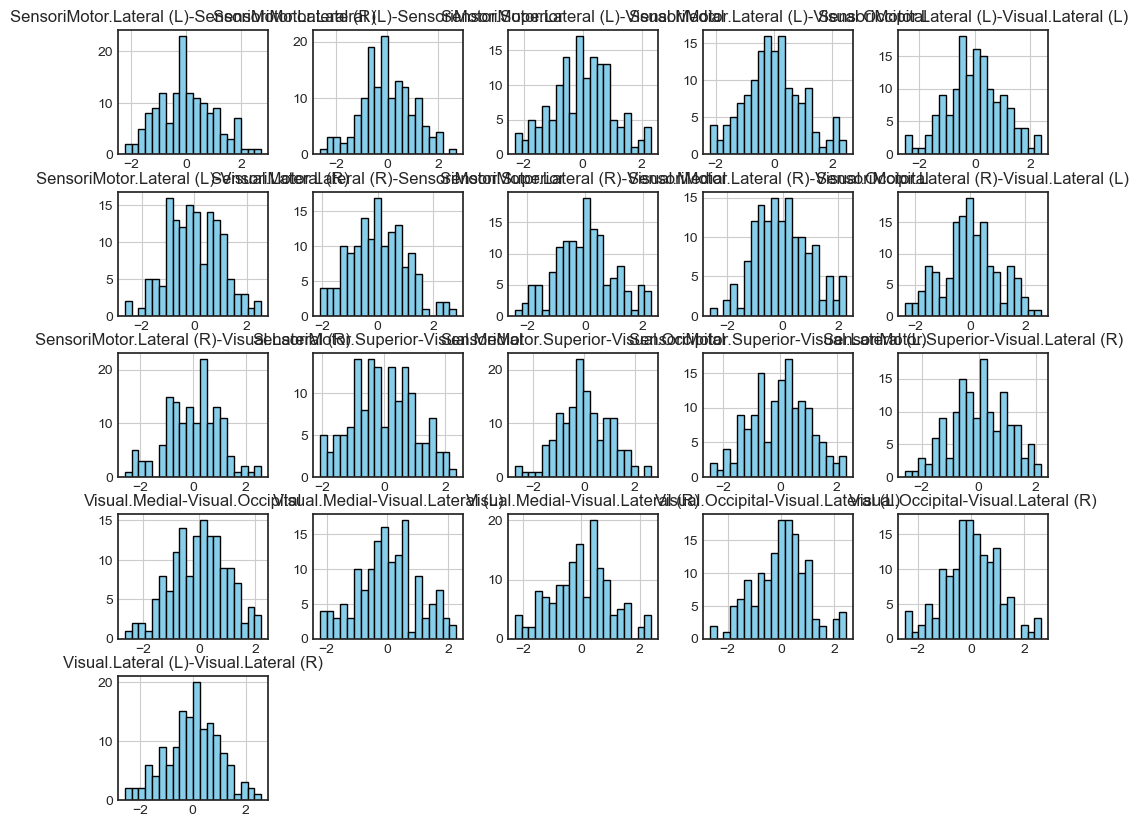

In [17]:
plt.style.use('seaborn-v0_8-white') 
data.iloc[:,4:].hist(bins = 20, figsize = (12,10), color = 'skyblue', edgecolor = 'black')

In [18]:
data.iloc[: , 1]

0           PD
1           PD
2           PD
3           PD
4           PD
        ...   
141    Control
142    Control
143    Control
144    Control
145    Control
Name: Group, Length: 146, dtype: object

### Step 3: Relationship between Age and Corr Sensory motor and visual networks

In [20]:
data.groupby(['Group']).sum()

,Subject,Sex,Age,SensoriMotor.Lateral (L)-SensoriMotor.Lateral (R),SensoriMotor.Lateral (L)-SensoriMotor.Superior,SensoriMotor.Lateral (L)-Visual.Medial,SensoriMotor.Lateral (L)-Visual.Occipital,SensoriMotor.Lateral (L)-Visual.Lateral (L),SensoriMotor.Lateral (L)-Visual.Lateral (R),SensoriMotor.Lateral (R)-SensoriMotor.Superior,...,SensoriMotor.Superior-Visual.Medial,SensoriMotor.Superior-Visual.Occipital,SensoriMotor.Superior-Visual.Lateral (L),SensoriMotor.Superior-Visual.Lateral (R),Visual.Medial-Visual.Occipital,Visual.Medial-Visual.Lateral (L),Visual.Medial-Visual.Lateral (R),Visual.Occipital-Visual.Lateral (L),Visual.Occipital-Visual.Lateral (R),Visual.Lateral (L)-Visual.Lateral (R)
Group,,,,,,,,,,,,,,,,,,,,,
Control,11675565,MMMMFFFMMMMMMMFMMMMMMMMMMFFMMMFMMMFMMFMMFFFMFM...,4987,6.229972,18.537546,7.625473,4.68053,2.940834,4.705624,11.834508,...,10.212122,4.83042,12.158854,12.234505,11.465264,1.341124,0.040941,5.53801,10.331046,0.491496
PD,239351,MMFMFMMMFMMMMMFFMMMFMMMMMFMMMMMMMMFMFMMFFFMMMM...,4405,-6.229972,-18.537546,-7.625473,-4.68053,-2.940834,-4.705624,-11.834508,...,-10.212122,-4.83042,-12.158854,-12.234505,-11.465264,-1.341124,-0.040941,-5.53801,-10.331046,-0.491496


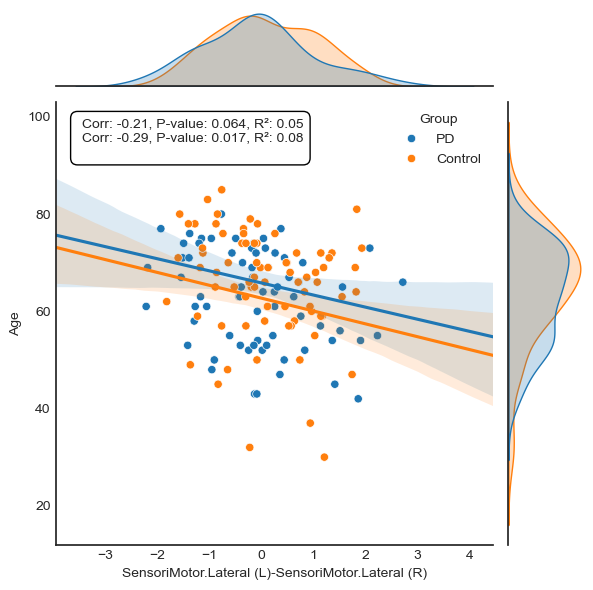

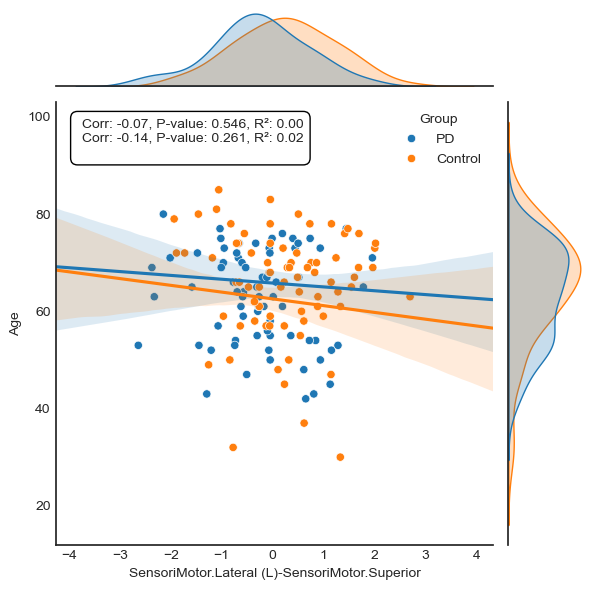

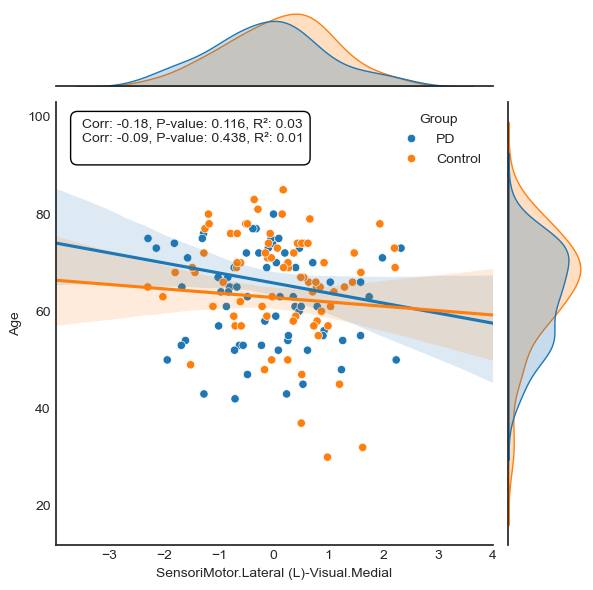

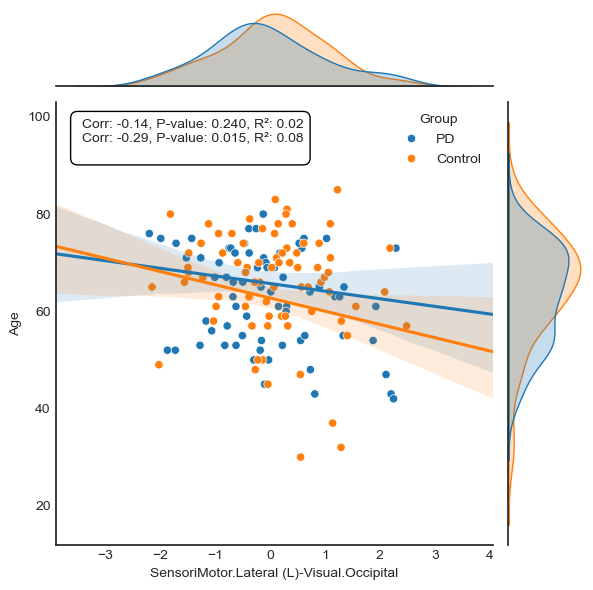

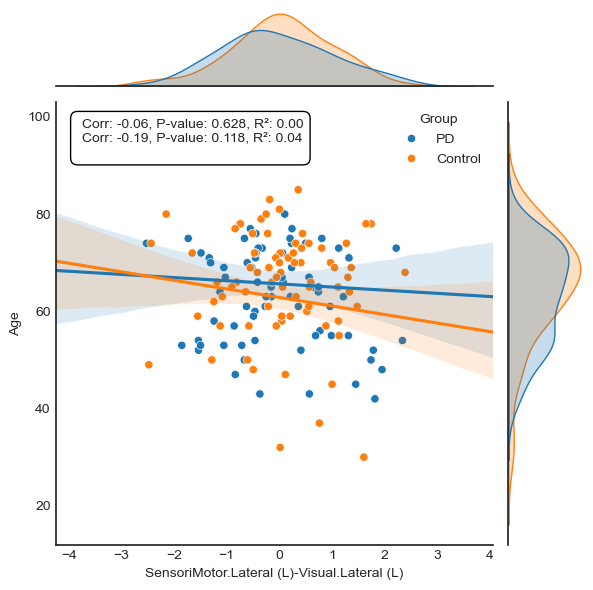

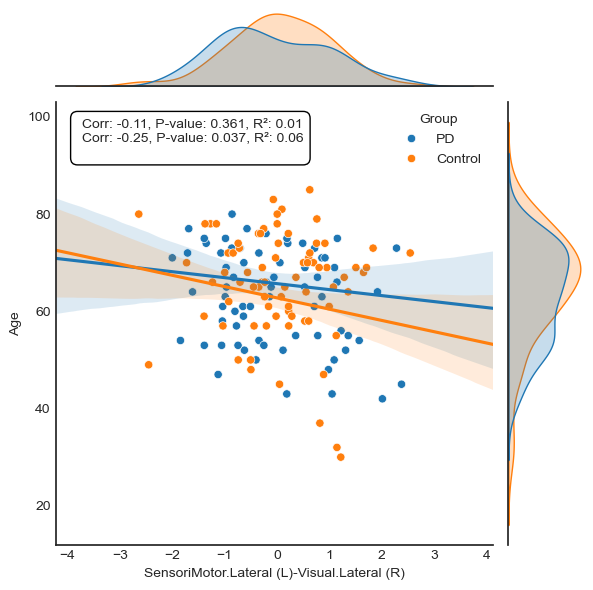

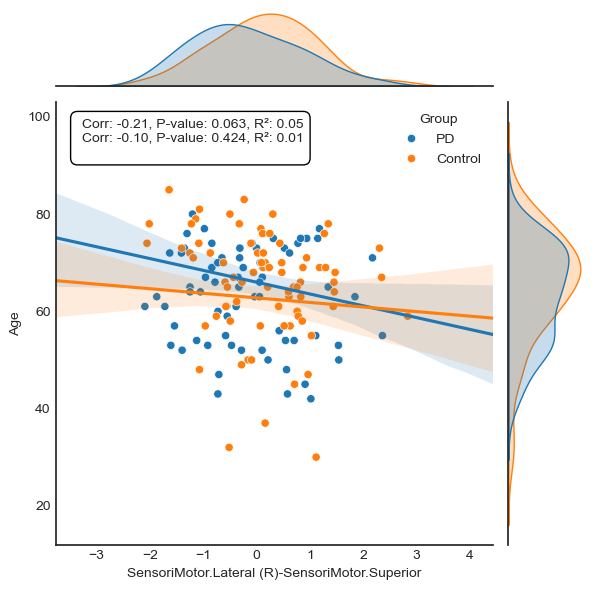

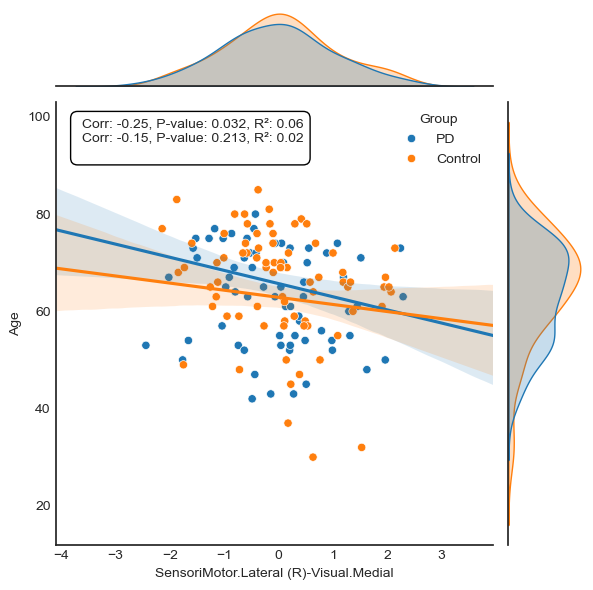

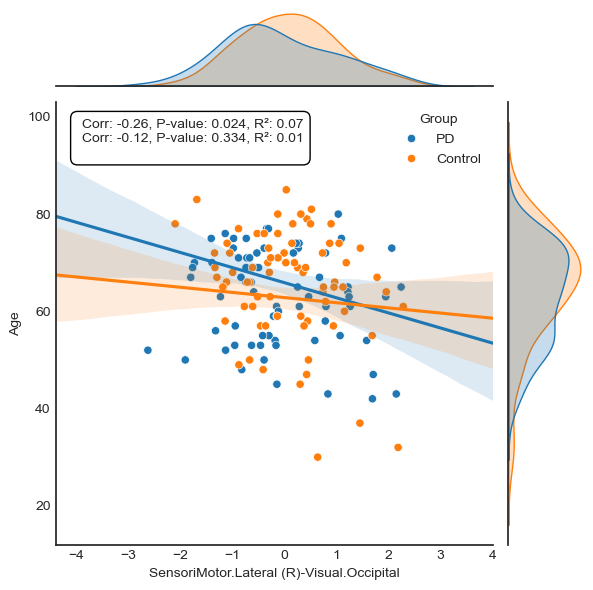

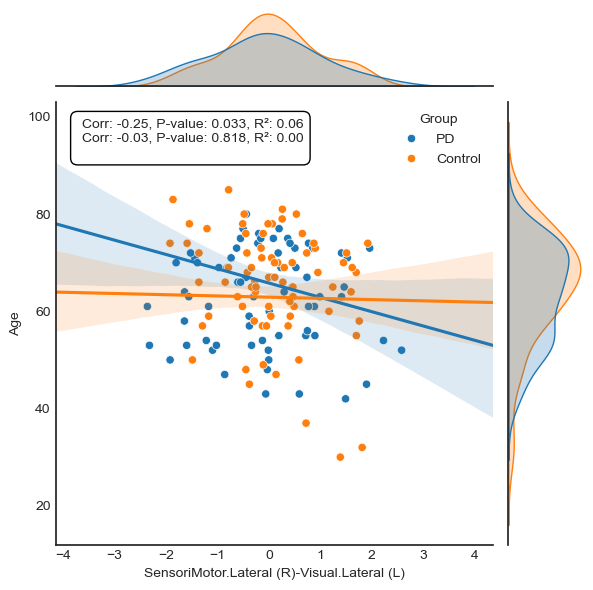

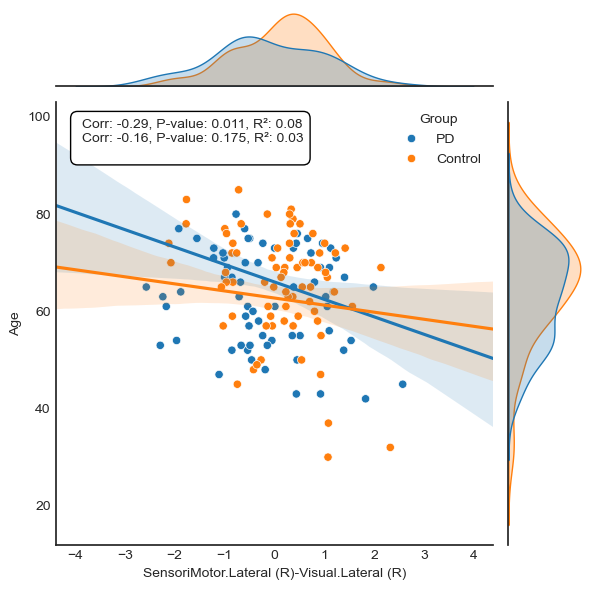

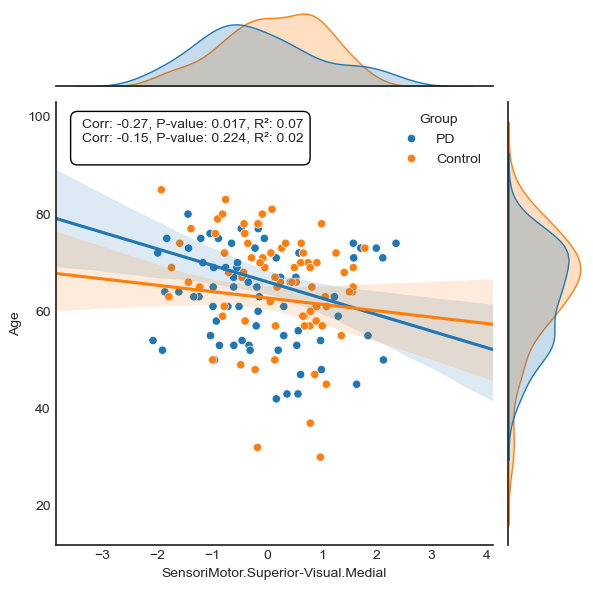

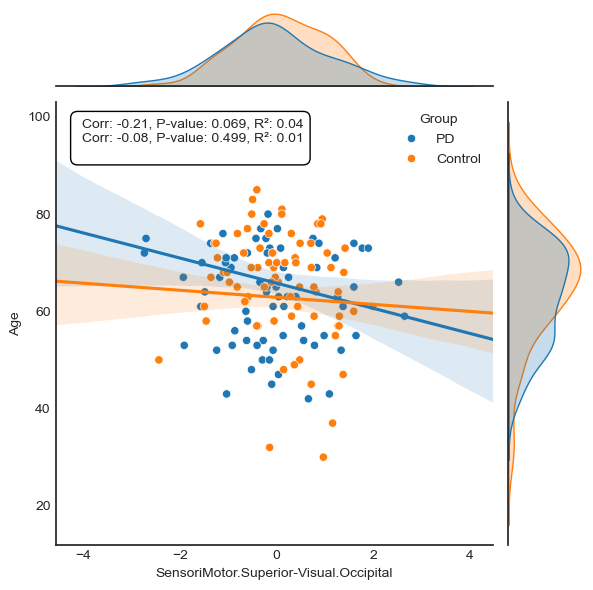

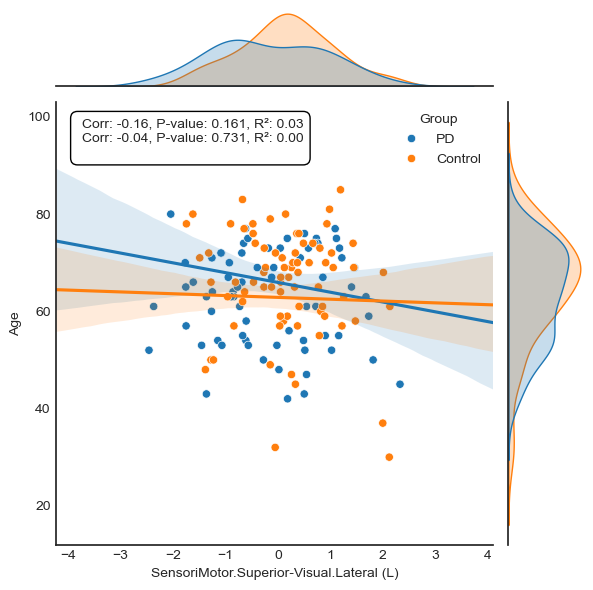

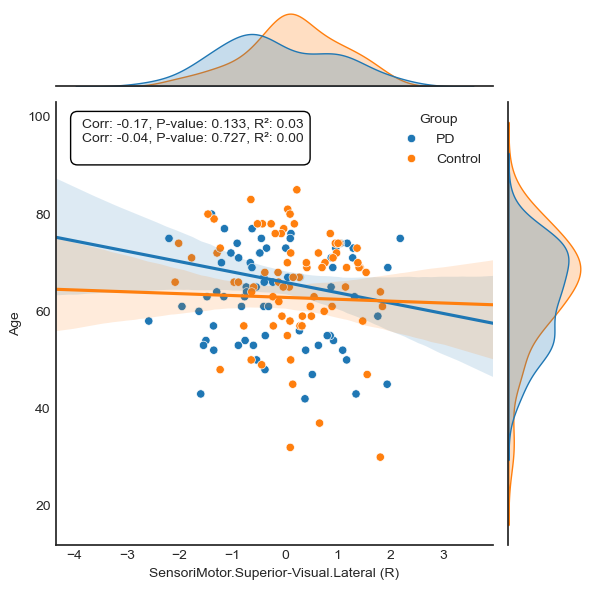

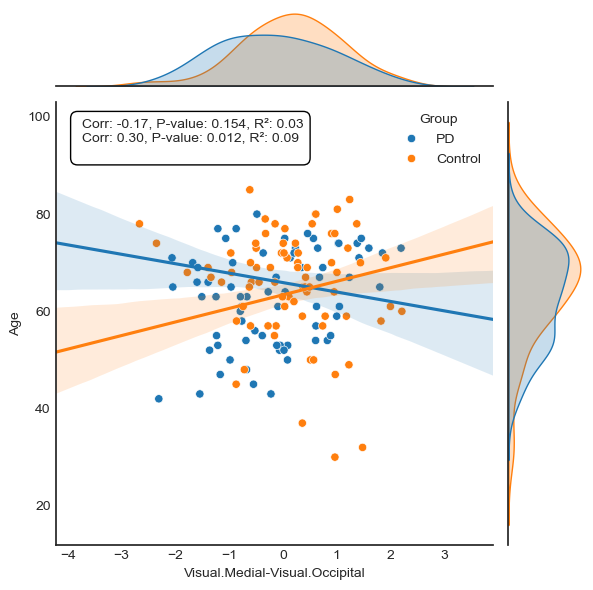

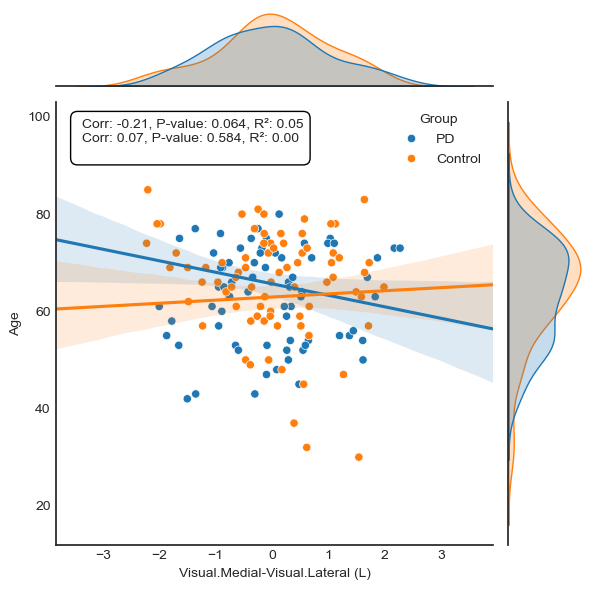

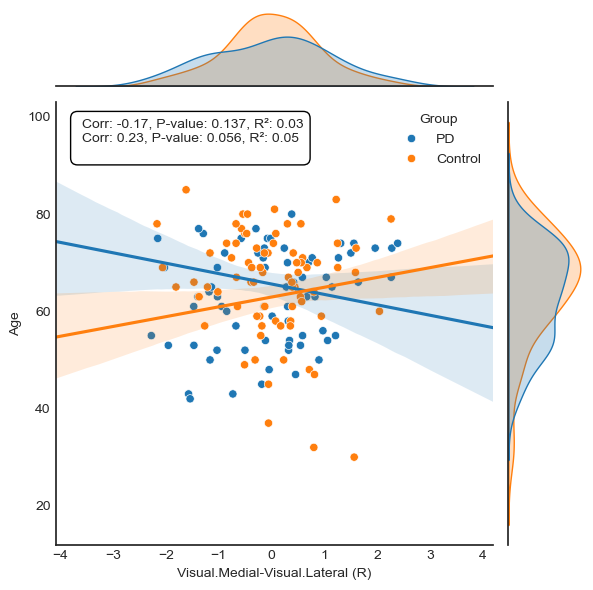

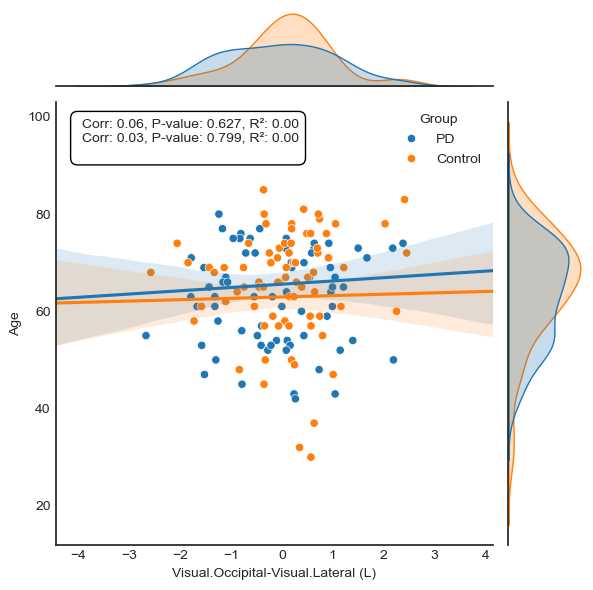

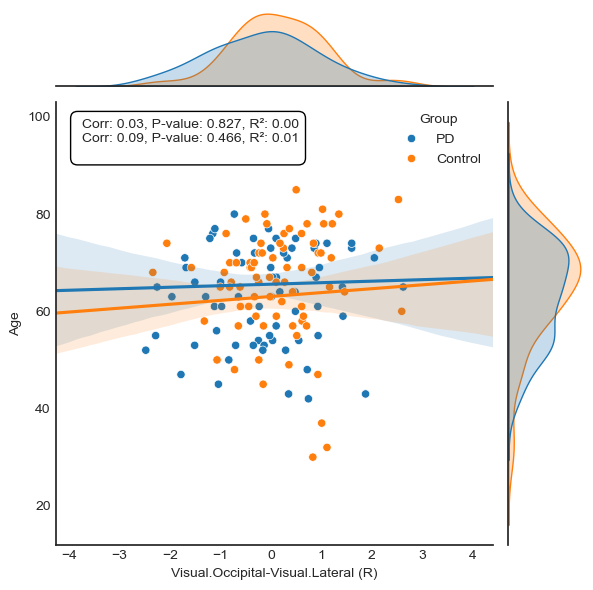

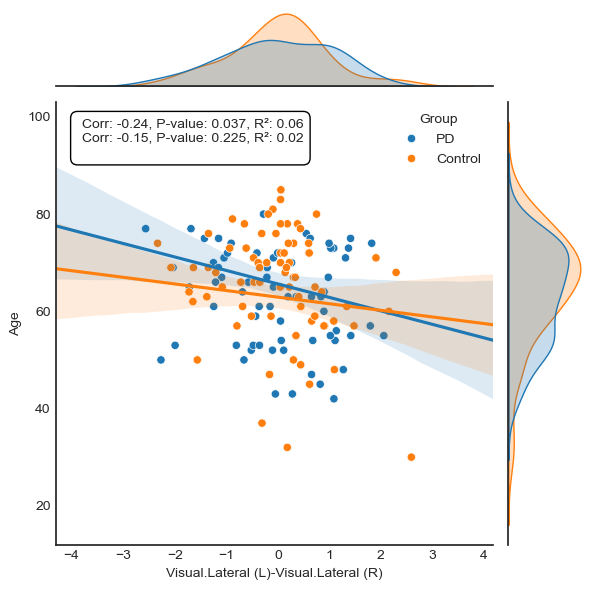

In [21]:
plt.style.use('seaborn-v0_8-white') 
for feature in data.iloc[:, 4:].columns:
    g = sns.jointplot(x=data[feature], y=data.iloc[:, 3], hue=data.iloc[:, 1], kind='scatter')
    annotation_text = ""
    for i, (group_name, group_data) in enumerate(data.groupby('Group')):
        sns.regplot(x=group_data[feature], y=group_data.iloc[:, 3], scatter=False, ax=g.ax_joint, truncate=False)
        corr, p_value = stats.pearsonr(group_data[feature], group_data.iloc[:, 3])
        slope, intercept, r_value, _, _ = stats.linregress(group_data[feature], group_data.iloc[:, 3])
        r_squared = r_value ** 2
        annotation_text += f' Corr: {corr:.2f}, P-value: {p_value:.3f}, R²: {r_squared:.2f}\n'

    g.ax_joint.annotate(annotation_text, 
                        xy=(0.05, 0.88), xycoords='axes fraction', fontsize=10, 
                        bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
    g.ax_joint.set_xlabel(feature, fontsize=10)
    g.ax_joint.set_ylabel('Age', fontsize=10)
    plt.show()

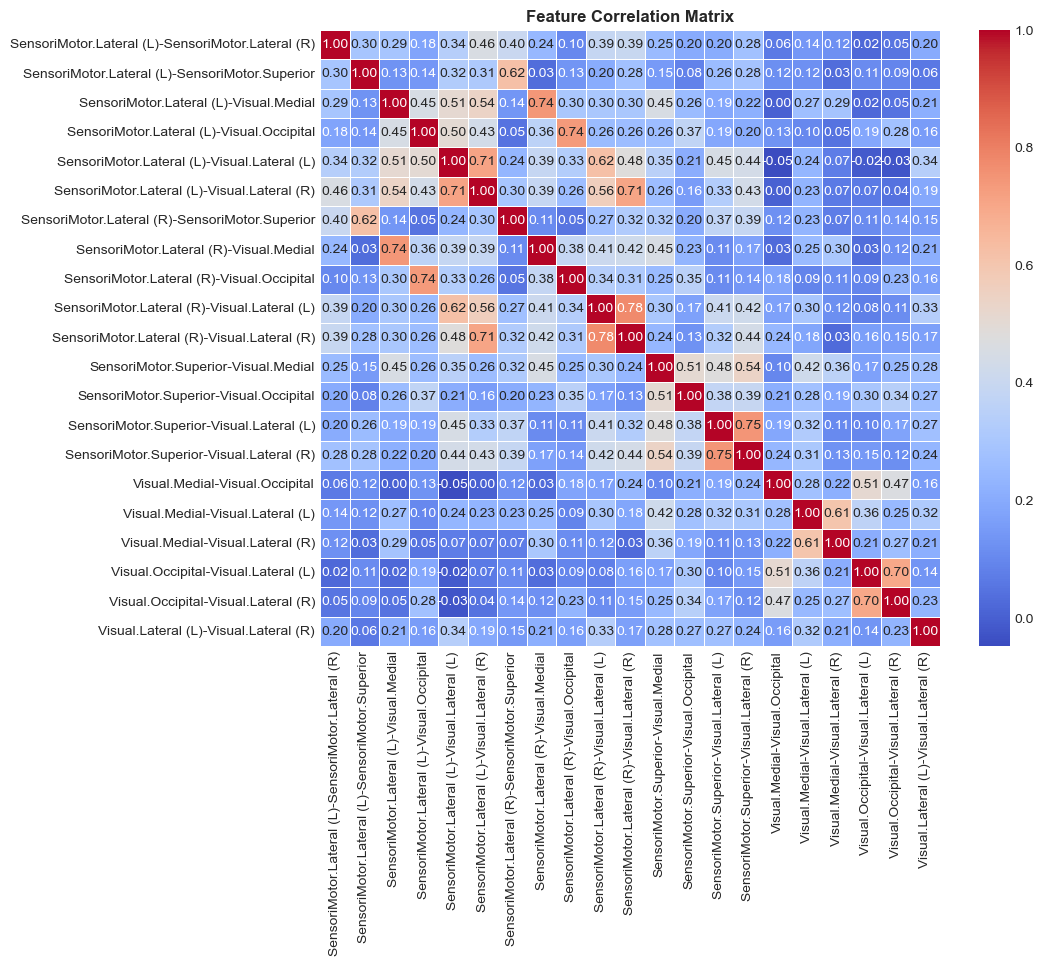

In [42]:
corr_matrix = data.iloc[:, 4:].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Feature Correlation Matrix', fontsize=12, fontweight='bold')
plt.show()